In [1]:
%load_ext autoreload
%autoreload 2
import viewscad

r = viewscad.Renderer()

In [2]:
from solid.objects import cube, cylinder, translate, linear_extrude, mirror, Vec3, rotate
from solid.utils import arc

In [3]:
import math

cutout_rotation = 84
cutout_lead_space = 30
cutout_thickness = 11
ipad_length = 280
base_thickness = 4
base_width = 80
base_length = (
    math.cos(math.pi * cutout_rotation / 180) * ipad_length +
    2 * cutout_lead_space + cutout_thickness + 2 * base_thickness
)
base_length

108.26796971494296

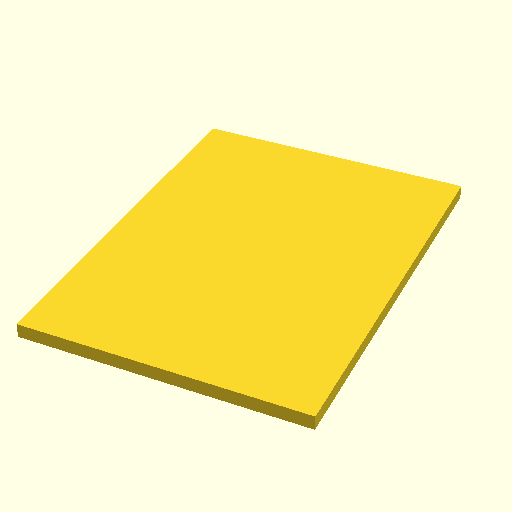

In [4]:
base = cube(
    size=(base_width, base_length, base_thickness)
)
base

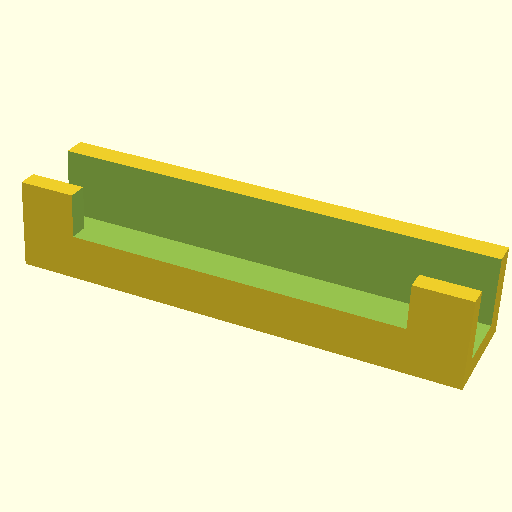

In [5]:
cutout = cube(
    size=(base_width * 2, base_length * 2, cutout_thickness)
)

cutout_height = 4
cutout = rotate(
    a=cutout_rotation, v=(1, 0, 0)
)(cutout)
cutout = translate((-base_width / 2, cutout_lead_space, cutout_height))(cutout)

outside = cube(
    size=(base_width, base_thickness * 4, cutout_thickness + 2 * base_thickness)
)
outside = rotate(
    a=cutout_rotation, v=(1, 0, 0)
)(outside)
outside = translate((0, cutout_lead_space + base_thickness, 0))(outside)

front_cutout_width = 60
front_cutout_raise = 5
front_cutout = cube(
    size=(60, base_length * 2, cutout_thickness)
)
front_cutout = rotate(
    a=cutout_rotation, v=(1, 0, 0)
)(front_cutout)
front_cutout = translate(
    ((base_width - front_cutout_width) / 2,
     cutout_lead_space - base_thickness,
     cutout_height + front_cutout_raise)
)(front_cutout)

outside - cutout - front_cutout

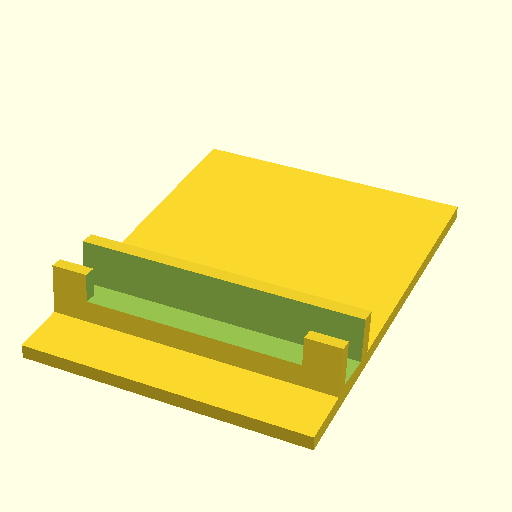

In [6]:
holder = base + outside - cutout - front_cutout
holder

In [7]:
# generate valid openscad code and store it in file
from solid import scad_render_to_file
scad_render_to_file(holder, 'holder.scad')

# run openscad and export to stl
from subprocess import run
run(["openscad", "-o",  "holder.stl", "holder.scad"])

CompletedProcess(args=['openscad', '-o', 'holder.stl', 'holder.scad'], returncode=0)